In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 25s 0us/step


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

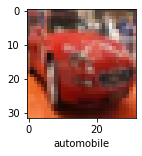

In [13]:
plot_sample(X_train, y_train, 5)

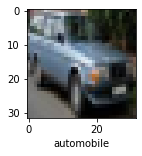

In [19]:
plot_sample(X_train, y_train, 201)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.8110 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6220 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5404 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4819 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4335 - accuracy: 0.4945


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.50      0.63      0.55      1000
           1       0.67      0.54      0.60      1000
           2       0.33      0.47      0.39      1000
           3       0.46      0.11      0.17      1000
           4       0.45      0.35      0.39      1000
           5       0.33      0.54      0.41      1000
           6       0.63      0.37      0.46      1000
           7       0.47      0.65      0.55      1000
           8       0.63      0.57      0.60      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [25]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

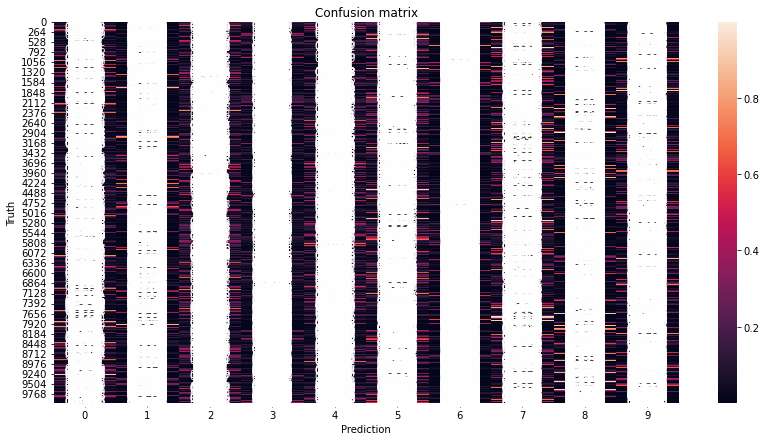

In [26]:
plt.figure(figsize = (14, 7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
                  
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'softmax')
])

In [29]:
cnn.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

In [30]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5428 - accuracy: 0.4515
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1485 - accuracy: 0.6003
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0050 - accuracy: 0.6500
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9213 - accuracy: 0.6818
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8534 - accuracy: 0.7055
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7937 - accuracy: 0.7236
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7410 - accuracy: 0.7422
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6983 - accuracy: 0.7579
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6556 - accuracy: 0.7712
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [31]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9657 - accuracy: 0.6840


[0.9657089114189148, 0.6840000152587891]

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[5.14965598e-03, 4.11764864e-04, 5.27668325e-03, 7.71598816e-01,
        8.89907591e-04, 7.31711313e-02, 7.65408715e-03, 2.74047721e-04,
        1.35336205e-01, 2.37704051e-04, 5.52892132e-09, 2.71824490e-12,
        1.42140614e-11, 1.56288506e-11, 3.20415200e-12, 1.65723582e-13,
        3.64338984e-13, 5.62705993e-11, 1.24725978e-12, 9.65990309e-13,
        3.75658749e-12, 6.97682710e-12, 3.56041557e-10, 1.28333715e-12,
        3.74175829e-11, 3.39535388e-12, 1.28180216e-10, 6.58576058e-13,
        3.64091222e-12, 6.17582985e-10, 3.70008971e-12, 4.68009138e-12,
        1.11627487e-11, 1.58425942e-12, 4.78336988e-12, 3.96596905e-12,
        1.60197237e-11, 7.18125726e-10, 3.37977606e-12, 1.89802449e-12,
        9.51280921e-09, 7.43059260e-12, 4.26979551e-13, 2.58835748e-11,
        9.33120248e-12, 1.74197046e-09, 1.86433703e-12, 5.04007502e-10,
        8.38648161e-12, 1.15394489e-12, 6.00864193e-13, 2.08974546e-10,
        3.64580414e-12, 1.17416200e-12, 1.00499575e-09, 5.382774

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

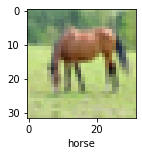

In [38]:
plot_sample(X_test, y_test, 60)

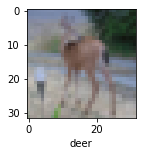

In [36]:
plot_sample(X_test, y_test, 100)

In [39]:
classes[y_classes[60]]

'horse'

In [40]:
classes[y_classes[1]]

'ship'

In [41]:
classes[y_classes[11]]

'truck'

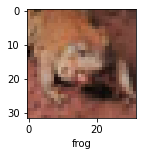

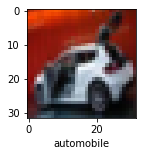

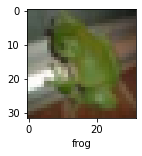

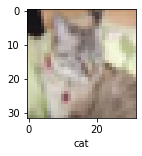

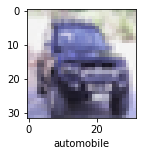

In [42]:
for i in range(5, 10):
    plot_sample(X_test, y_test, i)

In [49]:
print('classification report: \n', classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.50      0.63      0.55      1000
           1       0.67      0.54      0.60      1000
           2       0.33      0.47      0.39      1000
           3       0.46      0.11      0.17      1000
           4       0.45      0.35      0.39      1000
           5       0.33      0.54      0.41      1000
           6       0.63      0.37      0.46      1000
           7       0.47      0.65      0.55      1000
           8       0.63      0.57      0.60      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000

